In [11]:
import pandas as pd
import pylab as pl  
import numpy as np 
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
ubicacion = r"C:\Users\randy\Downloads\recursos_humanos.csv"
cell_df = pd.read_csv(ubicacion)
cell_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [28]:
# Checamos los valores de la variable a predecir
valores_unicos_left = cell_df['left'].unique()
print(valores_unicos_left)

[1 0]


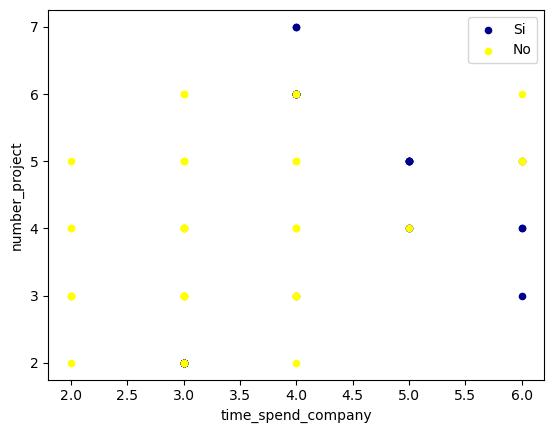

In [19]:
ax = cell_df[cell_df['left'] == 1][0:50].plot(kind='scatter', x='time_spend_company', y='number_project', color='Darkblue', label='Si');
ax = cell_df[cell_df['left'] == 0][0:50].plot(kind='scatter', x='time_spend_company', y='number_project', color='Yellow', label='No', ax=ax)
plt.show()

In [20]:
# Pre-procesamiento de datos y seleccion 
cell_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [29]:
# Preparamos las variables 'satisfaction_level' y la variable 'last_evaluation' en el cual redondeamos sus valors y los convertimos en INT
cell_df['satisfaction_level'] = cell_df['satisfaction_level'].round().astype(int)
cell_df['last_evaluation'] = cell_df['last_evaluation'].round().astype(int)
print(cell_df[['satisfaction_level', 'last_evaluation']].head())

   satisfaction_level  last_evaluation
0                   0                1
1                   1                1
2                   0                1
3                   1                1
4                   0                1


In [30]:
# Checamos las convercion
cell_df.dtypes

satisfaction_level        int32
last_evaluation           int32
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
sales                    object
salary                    int64
dtype: object

In [31]:
# Checamos los valores de la variable 'sales' para identificar si es funcional en nuestro modelo
valores_unicos_sales = cell_df['sales'].unique()
print(valores_unicos_sales)

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [25]:
# De igual forma vemos los valores de la variable 'salary' y en este caso la variable es funcional al modelo y la cuestion en practica
valores_unicos_salary = cell_df['salary'].unique()
print(valores_unicos_salary)

['low' 'medium' 'high']


In [26]:
# Vamos a remplazar los valores de la columna 'salary' donde 'low' sera 0 y 'medium' sera 1 y 'high' sera 2 
cell_df['salary'] = cell_df['salary'].replace(['low'],0) # salario bajo '0'
cell_df['salary'] = cell_df['salary'].replace([['medium']],1) # salario medio '1'
cell_df['salary'] = cell_df['salary'].replace([['high']],2) # salario alto '2'
cell_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,1,2,157,3,0,1,0,sales,0
1,1,1,5,262,6,0,1,0,sales,1
2,0,1,7,272,4,0,1,0,sales,1
3,1,1,5,223,5,0,1,0,sales,0
4,0,1,2,159,3,0,1,0,sales,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,1,2,151,3,0,1,0,support,0
14995,0,0,2,160,3,0,1,0,support,0
14996,0,1,2,143,3,0,1,0,support,0
14997,0,1,6,280,4,0,1,0,support,0


# Dejamos a fuera las variables 'average_montly_hours' y 'sales' y claramente la variable a predecir que en este caso es 'left'

In [27]:
feature_df = cell_df[['satisfaction_level', 'last_evaluation', 'number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']]
X = np.asarray(feature_df)
X[0:5]

array([[0, 1, 2, 3, 0, 0, 0],
       [1, 1, 5, 6, 0, 0, 1],
       [0, 1, 7, 4, 0, 0, 1],
       [1, 1, 5, 5, 0, 0, 0],
       [0, 1, 2, 3, 0, 0, 0]], dtype=int64)

In [32]:
# separamos la variable a predecir 'left'
cell_df['left'] = cell_df['left'].astype('int')
y = np.asarray(cell_df['left'])
y[0:5]

array([1, 1, 1, 1, 1])

In [40]:
# Creacion de grupos de entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Grupo de entrenamiento', X_train.shape, y_train.shape)
print('Grupos de Prueba', X_test.shape, y_test.shape)

Grupo de entrenamiento (11999, 7) (11999,)
Grupos de Prueba (3000, 7) (3000,)


# Creacion del modelo SVM
Con Kernel  Radial Basis Function (RBF)

In [41]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [42]:
# Prediccion para la base de prueba
yhat = clf.predict(X_test)
yhat[0:5]

array([0, 1, 0, 0, 0])

In [43]:
# Creacion de matriz de confuncion
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
cm = confusion_matrix(y_test, yhat)
cm

array([[2163,  124],
       [  58,  655]], dtype=int64)

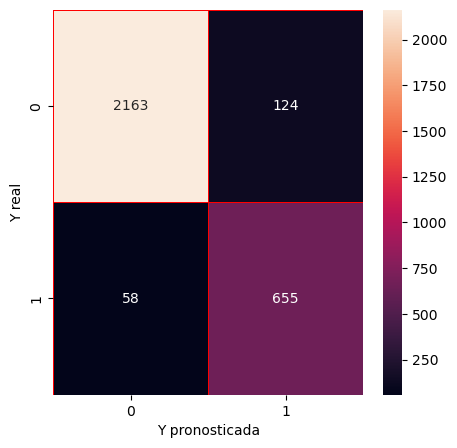

In [44]:
# Visualisacion de matriz de confucion
import seaborn as sns
f, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cm, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel('Y pronosticada')
plt.ylabel('Y real')
plt.show()

# Creamos la Estadistica de desempeño

In [45]:
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test,  yhat, labels=[0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2287
           1       0.84      0.92      0.88       713

    accuracy                           0.94      3000
   macro avg       0.91      0.93      0.92      3000
weighted avg       0.94      0.94      0.94      3000



# Probaremos otros Kernels del modelo para poder ver si logramos tener un porcentaje mas alto de efectividad 

# Prueba de SVM con kernel lineal

In [46]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
cm= confusion_matrix(y_test, yhat)
cm 

array([[1928,  359],
       [ 231,  482]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test,  yhat, labels=[0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      2287
           1       0.57      0.68      0.62       713

    accuracy                           0.80      3000
   macro avg       0.73      0.76      0.74      3000
weighted avg       0.82      0.80      0.81      3000



Podemos notar que el Kernel 'Linear' en este caso no mejoro nuestro modelo

# Probamos el Kernel Polynomial

In [48]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
cm= confusion_matrix(y_test, yhat)
cm 

array([[2192,   95],
       [ 510,  203]], dtype=int64)

In [49]:
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test,  yhat, labels=[0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      2287
           1       0.68      0.28      0.40       713

    accuracy                           0.80      3000
   macro avg       0.75      0.62      0.64      3000
weighted avg       0.78      0.80      0.77      3000



Este kernel tampoco fue de gran ayuda

# Prueba de SVM con kernel Sigmoide

In [52]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
cm= confusion_matrix(y_test, yhat)
cm 

array([[1895,  392],
       [ 408,  305]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test,  yhat, labels=[0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2287
           1       0.44      0.43      0.43       713

    accuracy                           0.73      3000
   macro avg       0.63      0.63      0.63      3000
weighted avg       0.73      0.73      0.73      3000



# Este kernel tampoco fue de gran ayuda a lo que nos quedamos con el Kernel que mejores porcentajes nos arrojo y en este caso fue ' Radial Basis Function (RBF)'

In [54]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
cm= confusion_matrix(y_test, yhat)
cm 

array([[2163,  124],
       [  58,  655]], dtype=int64)

In [55]:
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test,  yhat, labels=[0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2287
           1       0.84      0.92      0.88       713

    accuracy                           0.94      3000
   macro avg       0.91      0.93      0.92      3000
weighted avg       0.94      0.94      0.94      3000



# pregnta 1: ¿Cuál resultó ser el modelo predictivo más adecuado? Explique su razonamiento.

El modelo predictivo que mas porcentaje arrojo fue el del kernel ' Radial Basis Function (RBF)'
Podemos notar que el modelo arroja buenos porcentajes a la prediccion de valores dando un Valoracion Global del modelo de 96% de efectivo para este caso.
Tambien arroja un pocentaje alto en F1score al detectar trabajadores que no estarian fuera de la empresa con un 96% de efectividad al detectarlos
Sin embargo al detectar personal que estaria fuera de la empresaa, escasea un poco la eficasia dando un 88% de efectividad.

# Ahora  Desglosaremos los porcentajes arrojados por 'classification_report' 

# Para esto hay que tomar en cuenta que: 'left' Variable a predecir y si el empleado dejó o no la empresa (1 = Sí, 0 = No).

# Determinacion de Nieveles de precision (Precision)
la precision = al Porcentaje % de predicciones correctas relativas al total de predicciones
* El total esta calculado por columna
* Se contesta a la pregunta siguiente: ¿Que porcentaje de las veces que hacemos un pronostico de cierto tipo, este es correcto?

In [56]:
precisionNO = cm[0,0] / (cm[0,0] + cm[1,0])
precisionNO

0.9738856371004052

In [57]:
PrecisionSI = cm[1,1] / (cm[1,1] + cm[0,1])
PrecisionSI

0.8408215661103979

# Determinacion de niveles de Recuperacion (RECALL)
La Recuperacion (Recall) = Porcentaje de Predicciones correctas relativas al total de valores reales
* El total se calcula por renglon 
* Se contesta la pregunta: ¿Que porcentaje de las veces que se tiene un valor es capaz de identificarlo?

In [58]:
recollNO = cm[0,0] / (cm[0,0] + cm[0,1])
recollNO

0.9457804984696109

In [59]:
recollSI = cm[1,1] / (cm[1,1] + cm[1,0])
recollSI

0.9186535764375876

# Determinacion del escore F1 (F1score)
F1 Score = Media Armonica ponderada de la Precision y la recuperacion. Cuanto mas se acerque a, 1 mejor sera el modelo
* F1 score = 2 * (Precision * Recall) / (Precision + Recall)

In [60]:

F1NO = 2 * (precisionNO * recollNO) / (precisionNO + recollNO)
F1NO

0.9596273291925467

In [61]:
F1SI = 2 * (PrecisionSI * recollSI) / (PrecisionSI + recollSI)
F1SI

0.8780160857908847

# Determinacion de Soporte
Soporte = Numero de Observaciones que pertenecen en forma real a cada clase posible (Total por renglon)

In [62]:
SoporteNO = cm[0,0] + cm[0,1]
SoporteNO

2287

In [63]:
SoporteSI = cm[1,0] + cm[1,1]
SoporteSI

713

# Determinacion de la precision Global (Accuracy)
Accuracy = Porcentaje de predicciones correctas

In [64]:
Correctos = cm[0,0] + cm[1,1]
Incorrectos = cm[0,1] + cm[1,0]
PrecisionGlobal = Correctos / (Correctos + Incorrectos)
PrecisionGlobal

0.9393333333333334

# Promedio Simple Por Indicador (Macro Average)
Promediuos Simples Por Precision, Recuperacion y F1 Score 

In [65]:
MacroAvgPrecision = (precisionNO + PrecisionSI) / 2
MacroAvgPrecision

0.9073536016054016

In [66]:
MacroAvgrecoll = (recollNO + recollSI) / 2
MacroAvgrecoll

0.9322170374535992

In [67]:
MacroAvgF1score = (F1NO + F1SI) / 2
MacroAvgF1score

0.9188217074917158

# Promedios Ponderados Por Indicador (Weighted Average)
Promedios Ponderados de acuerdo a sopportes por inndicador

In [70]:
PesoNO = SoporteNO / (SoporteNO + SoporteSI)
PesoSI = SoporteSI / (SoporteNO + SoporteSI)

In [71]:
WavgPrecision = precisionNO * PesoNO + PrecisionSI * PesoSI
WavgPrecision

0.9422607428951135

In [72]:
WavgRecoll = recollNO * PesoNO + recollSI * PesoSI
WavgRecoll

0.9393333333333334